# Introduction

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.in2p3.fr%2Fenergy4climate%2Fpublic%2Feducation%2Fmachine_learning_for_climate_and_energy/master?filepath=book%2Fnotebooks%2F1_introduction.ipynb)

<div class="alert alert-block alert-warning">
    <b>Prerequisites</b>
    
- Basics in linear algebra and calculus

</div>

<div class="alert alert-block alert-info">
    <b>Learning Outcomes</b>
    
- Overview of the class
- Reanalysis data set
- Data manipulation in python

</div>

## The IPCC report

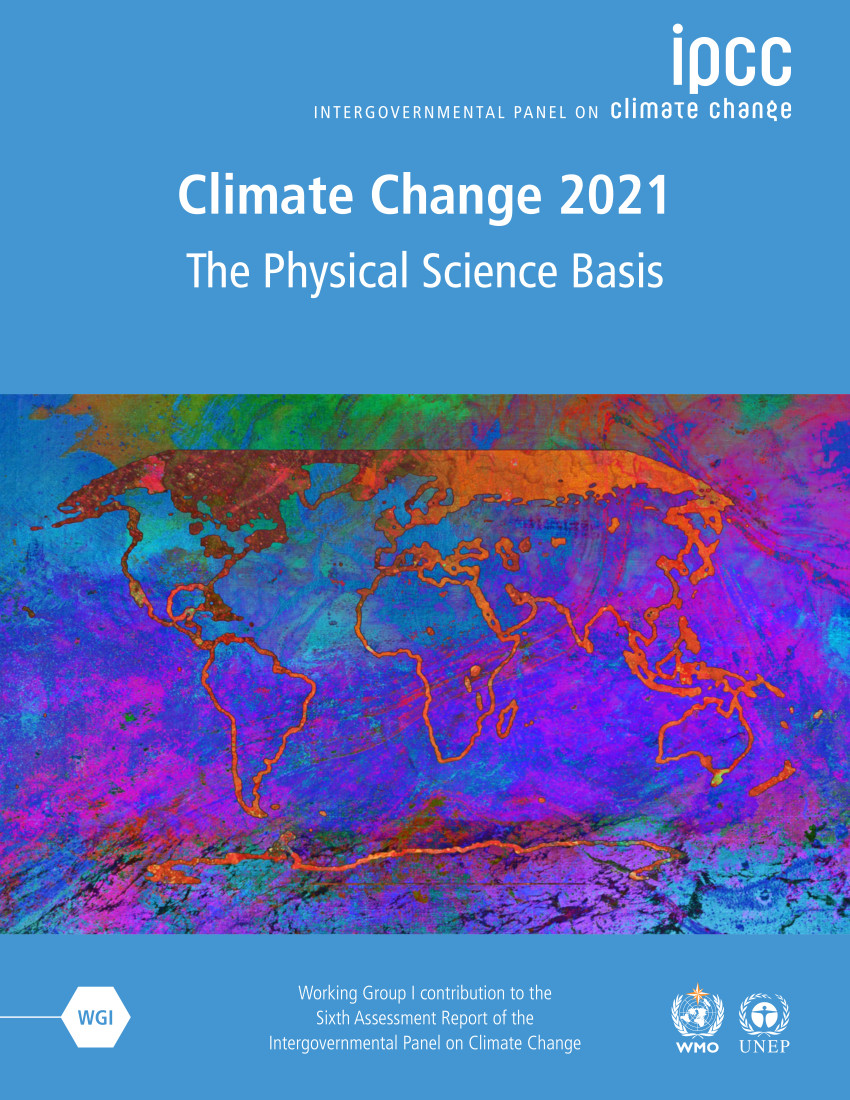

The working group 1 (WG1) of the Intergovernmental Panel on Climate Change (IPCC) is a group of scientists who assess and quantify climate change. In order to provide an accurate description of the future climate, they use numerical models also known as Climate Model Intercomparison Project (CMIP).

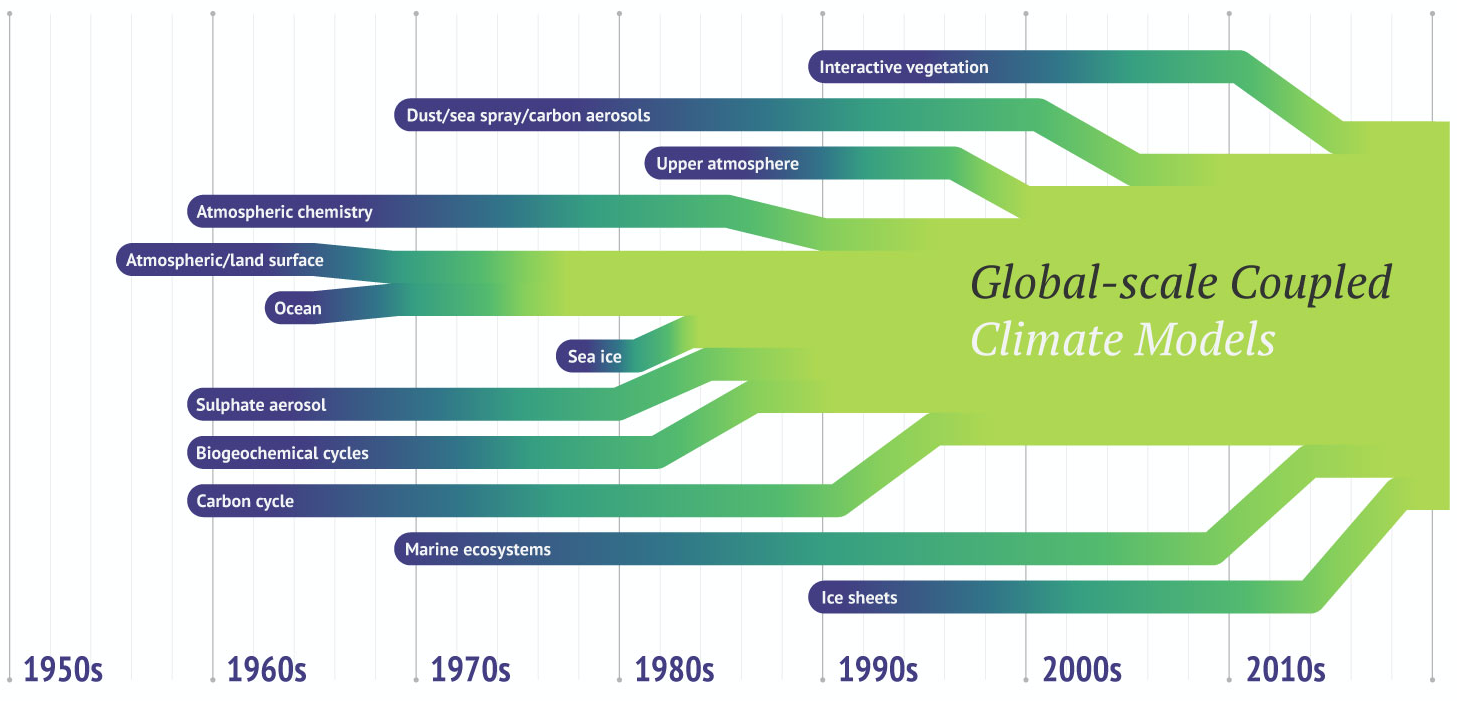
*Historical evolution of the components of climate models [Credit: CarbonBrief: Q&A How do climate models work?](https://www.carbonbrief.org/qa-how-do-climate-models-work)*

Each component of these models is 

There are several scenarios (Shared Socioeconomic Pathways) ranging from very optimistic (SS1: sustainability) to (very) pessimistic (SS5: Fossil fuel development)

In CMIP6, there are over 100 full blown models that attempt to propose the most reliable forecast for each of these scenarios [Balaji et. al (2018)](https://gmd.copernicus.org/articles/11/3659/2018/gmd-11-3659-2018.pdf)

> How much data was produced to construct this repport?

We will try to get a proxy for the amount of data produced with the number of pages in this report. Below is a plot with the number of pages for each Assesment Report (AR) between 1990 and 2013. I added the *[Charney Report (1979)](https://en.wikipedia.org/wiki/Jule_Gregory_Charney#Charney_Report)* which is considered a precursor to the IPCC reports

Text(0, 0.5, '# of pages (WG1)')

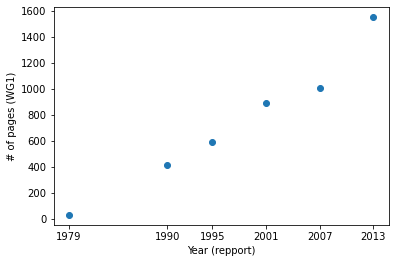

In [1]:
import numpy as np
import matplotlib.pyplot as plt

years = np.array([1979, 1990,1995,2001,2007,2013])
pages = np.array([30, 414, 588, 893, 1007, 1552])

plt.plot(years,pages,'o')

plt.xticks(years,years)
plt.xlabel("Year (repport)")
plt.ylabel("# of pages (WG1)")

The number of pages is steadily increasing for each AR. This is consistent with the way global models evolved over time (cf. figure above). This is also consistent with the increase of the spatial resolution: we have indeed more data to assess the regionality of climate change. Let's try to fit a linear model to see if we can predict the number of pages of the AR6 report (2021).

briefly explain linear regression..

\begin{equation}
y = ax + b
\end{equation}


According to the linear fit, there should be 1741 pages in the AR6 report


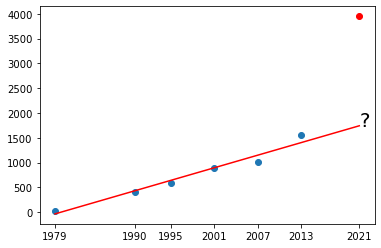

In [2]:

#linear regression
A = np.vstack([years, np.ones(len(years))]).T
m, c = np.linalg.lstsq(A, pages, rcond=None)[0]

plt.plot(years,pages,'o')

# add AR6 report
years = np.append(years, [2021])
pages = np.append(pages, [3949])

plt.plot(years, m*years + c, 'r', label='Fitted line')
plt.xticks(years,years)

plt.text(2021,m*2021 + c,"?", size=20)
plt.plot(years[-1],pages[-1],'or')
print("According to the linear fit, there should be {0:.0f} pages in the AR6 report".format(m*2021 + c))

In fact there are 3949 pages in AR6.
> What could have possibly gone wrong in our estimate of the number of pages for 2021?

In this problem we have one **input variable** (year) and one **output variable** (number of pages). We sometimes call the input variable the independant variables and the output variable the dependant variable as the latter is function of the input variables. We will denote the input variables with the letter $X$ and the output variable with the letter $Y$.

In general there can be several input variables:

> Propose several other input variables for the IPCC report problem.

Moreover, there are multiple observations of each input variable. We will gather all the observations of all input variables in a matrix $\mathbf X$ with $n$ rows (for each observation) and $p$ columns (for each type of variable):

\begin{align}
 \mathbf{X} &= \begin{bmatrix}
    x_{11} & x_{12} & \cdots & x_{1p}\\
    x_{21} & x_{22} & \cdots & x_{2p}\\
    \vdots & \vdots &        & \vdots\\
    x_{n1} & x_{n2} & \cdots & x_{np}\\
  \end{bmatrix}
\end{align}

We will restrict our analysis to problems where there is a single output variable.

> Based on our convention, is this output variable a row vector or a column vector?

In most machine learning problems, our task will be to propose an estimate of the function that gives the output variable based on the known input variables. This is based on our intuition that there *is* a relationship between the input and output variables in the form of

\begin{equation}
Y = f (X) + \epsilon\, ,
\end{equation}
with $f$ the function that we will try to guess and $\epsilon$ is an **Irreducible error** that can have multiple origins.

> - Give several sources of errors for the problem we are considering
> - If you consider enough input variables, can you get rid of $\epsilon$?

The above equation is the *ground truth*, however we usually don't know $f$. Our task is to propose an estimate of $f$ based on the sample observation that we have.  Because our observations are limited, we can only approximate $f$: we will denote this approximate function with a *hat* and write our prediction as

\begin{equation}
\hat Y = \hat f(X)
\end{equation}

Note that this equation is **deterministic**: there is no random noise in the right hand side. In fact, because we want to provide the best estimate, there is no need to add noise in the prediction: that would necessarily give a worse prediction (cf. class #2)

We can then use $\hat f$ to
- make predictions
- understand the relationship between several variables




Here are the common type of errors we are going to deal with in this class

- Bias error (Wrong model): We say a model is biases when a model is not able to capture the "true" relationship between features and target output

- Variance error (Wrong fit). High variance=overfitting
- Irreducible error (Noisy data)



## Introduction to classification

## Introduction to dimension reduction

## Introduction to neural networks

## Exemples of data sets and possible applications

One of the main data set that we are going to use in this class is the ERA (ECMWF ReAnalysis) data set. This data set consist in historical observation of the earth climate interpolated on a regular latitude-longitude grid. The procedure is called Data Assimilation (cf. last chapter).

Most variables in this data set are function of space and time $ T = T(x,y,z,t)$, ($x$: longitude, $y$: latitude, $z$: height, $t$: time)


## Linear algebra and calculus

Throughout this class we adopt the following conventions:

- Vectors are noted with bold lower case letters and are represented as columns

\begin{align}
 \mathbf{x} &= \begin{bmatrix}
    x_1 \\
    x_2 \\
    \vdots \\
    x_n \\
  \end{bmatrix}
\end{align}

- Matrix are noted with capital letters

\begin{align}
 \mathbf{A} &= \begin{bmatrix}
    a_{11} & a_{12} & \cdots & a_{1p}\\
    a_{21} & a_{22} & \cdots & a_{2p}\\
    \vdots & \vdots &        & \vdots\\
    a_{n1} & a_{n2} & \cdots & a_{np}\\
  \end{bmatrix}
\end{align}

We scalar product between two vectors $\mathbf{x}$ and $\mathbf{y}$ is given by
\begin{equation}
\mathbf{x}\cdot \mathbf{y} = \mathbf{x}^\top \mathbf{y} = \sum_i x_i y_i
\end{equation}

The matrix vector multiplication is
\begin{align}
\begin{bmatrix}
\mathbf{A}\mathbf{x}
\end{bmatrix}_i = \sum_{j} A_{ij} x_j
\end{align}

We then adopt the "Jacobian" convention or [Numerator layout](https://en.wikipedia.org/wiki/Matrix_calculus#Layout_conventions) for wich the gradient of a scalar function $f(\mathbf{x})$ is a row vector. 

\begin{align}
  \frac{\partial f}{\partial \mathbf{x}} &= \nabla_\mathbf{x} f &= \begin{bmatrix}
    \frac{\partial f}{\partial x_1} &
    \frac{\partial f}{\partial x_2} &
    \cdots                          &
    \frac{\partial f}{\partial x_n}
  \end{bmatrix}.
\end{align}


With this convention, partial derivative of vectors with respect to scalars are column vectors:
\begin{align}
  \frac{\partial \mathbf{x}}{\partial y} &= \begin{bmatrix}
    \frac{\partial x_1}{\partial y} \\
    \frac{\partial x_2}{\partial y} \\
    \cdots                          \\
    \frac{\partial x_n}{\partial y}
  \end{bmatrix},
\end{align}

and vector derivative of vectors are the Jacobian matrix

\begin{align}
  \frac{\partial \mathbf{y}}{\partial \mathbf{x}} &= \begin{bmatrix}
    \frac{\partial y_1}{\partial x_1} & \frac{\partial y_1}{\partial x_2} & \cdots & \frac{\partial y_1}{\partial x_n} \\
    \frac{\partial y_2}{\partial x_1} & \frac{\partial y_2}{\partial x_2} & \cdots & \frac{\partial y_2}{\partial x_n} \\
    \vdots                            & \vdots                            & \ddots & \vdots \\
    \frac{\partial y_p}{\partial x_1} & \frac{\partial y_p}{\partial x_2} & \cdots & \frac{\partial y_p}{\partial x_n}\\
  \end{bmatrix}.
\end{align}

Such that the $(i,j)$th element is
\begin{align}
\begin{bmatrix}
\frac{\partial \mathbf{y}}{\partial \mathbf{x}} 
\end{bmatrix}_{ij} = \frac{\partial y_i}{\partial x_j} 
\end{align}

With these conventions, we recall the following rules (with $\mathbf{A}$ and $\mathbf{a}$ not a function of $\mathbf{x}$, and $\mathbf{u}$, $\mathbf{v}$ funtions of $\mathbf{x}$):


\begin{equation}
\frac{\partial \mathbf{A}\mathbf{x}}{\partial \mathbf{x}} = \mathbf{A}
\end{equation}



Product:

\begin{equation}
\frac{\partial \mathbf{u}^\top \mathbf{v}}{\partial \mathbf{x}} = \mathbf{u}^\top \frac{\partial \mathbf{v}}{\partial \mathbf{x}} + \mathbf{v}^\top\frac{\partial \mathbf{u}}{\partial \mathbf{x}}
\end{equation}

The chain rule 

\begin{equation}
\frac{\partial \mathbf{f(g(x))}}{\partial \mathbf{x}} = \frac{\partial \mathbf{f(g)}}{\partial \mathbf{g}}\frac{\partial \mathbf{g(x)}}{\partial \mathbf{x}} 
\end{equation}

*Note that the order in which the operators appear matters for matrix multiplication*.

Be aware that there are other conventions but the end result should always be the same.

>  ***Question 1***
> - \begin{equation}
\frac{\partial \mathbf{a}u}{\partial \mathbf{x}} = ?
\end{equation}
> - \begin{equation}
\frac{\partial \mathbf{A}\mathbf{u}}{\partial \mathbf{x}} = ?
\end{equation}

<div class="alert alert-block alert-info">
    <b>Definitions</b>
    
- [**Supervised learning**](https://en.wikipedia.org/wiki/Supervised_learning) is the machine learning task of learning a function that maps an input to an output based on example input-output pairs (labelled data set). The key aspect of supervised learning is that there exists a training data set with labelled data.
- on the other hand, [**Unsupervised learning**](https://en.wikipedia.org/wiki/Unsupervised_learning) corresponds to the problem of guessing patterns in an unlabelled data set

</div>

## Introduction to python

Python is a well accepted versatile computer language. We will use it along with 3 libraries: numpy for array handeling, scikit-learn for machine learning tools and matplotlib for ploting. There are *a lot* of ressources on the web: the user manuel remains the primary location where you should look if you are looking for documentation about a specific function. https://stackoverflow.com/ is also a good source of informationsince many people before you have already had the same question as you. Here is a non exhaustive selection of resources

- https://sebastianraschka.com/blog/2020/numpy-intro.html
- etc

Even though python is a great language, don't forget that it is an [Interpreted language](https://en.wikipedia.org/wiki/Interpreter_(computing)). That means that python can be very slow. For this reason you shoud 

- Avoid loop
- Rely on existing libraries when available

Indeed, most modern libraries deffer the heavy lifting part to compiled bits of codes which typically run much faster than your own implementation.


### Numpy for array handling

Numpy is the core library when it comes to manipulating "dense" arrays of numbers and you should always use it instead of raw python lists. Numpy also comes with a couple of linear algebra routines to perform basic operations (matrix multiplication, linear systems, eigenvalue solver). However for large-scale application (and sparse matrices) we will use different libraries (like scipy).

In [2]:
import numpy as np

Vectors are first declared as a list of number and are then converted to numpy arrays. Note that python does not make the difference between row vectors and column vectors: all vectors are treated as rows.

In [3]:
x = np.array([1, 2, 3])
print(x)

[1 2 3]


Matrices are declared as an array of arrays in a similar way as vectors. Note that python is case sensitive

In [4]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(A)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In order to manipulate row or column vectors, one must add a new dimension as shown below:

In [6]:
x_col = x[:,None]
print(x_col)

[[1]
 [2]
 [3]]


Matrix multiplication can be achieved with `np.dot`, `np.matmul`, `@` or `np.einsum`.
> Pick the one you prefer to compute $\mathbf A \mathbf x$, $\mathbf x \mathbf x^\top$, and $\mathbf x^\top \mathbf x$.

- Hint: You can always check the dimensions of your array with the method `shape`.
- Hint2: Einsum is the most advanced function but also the most complicated. [This tutorial](https://ajcr.net/Basic-guide-to-einsum/) will tell you more about it

In [ ]:
# your code here

You can access the first element of an array with `x[0]` and the last element with `x[-1]`. You can also select a subset using slices like `x[0:2]` (or `x[:2]`). Be careful that the last index of the slice is not part of the subset.

> Can you select the last two element of the vector $\mathbf x$ with negative indices?

In [12]:
# your code here


Broadcasting

### Matplotlib for plotting

To vizualize data, matplotlib is the reference tool and it is necessary to know the basics. Matplotlib is also what runs behind the scene of high level python libraries (pandas, xarray) and so knowing the basics will also be useful there.

In [ ]:
import matplotlib.pyplot as plt

***
## Credit

[//]: # "This notebook is part of [E4C Interdisciplinary Center - Education](https://gitlab.in2p3.fr/energy4climate/public/education)."
Contributors include Bruno Deremble and Alexis Tantet.

<br>

<div style="display: flex; height: 70px">
    
<img alt="Logo LMD" src="images/logos/logo_lmd.jpg" style="display: inline-block"/>

<img alt="Logo IPSL" src="images/logos/logo_ipsl.png" style="display: inline-block"/>

<img alt="Logo E4C" src="images/logos/logo_e4c_final.png" style="display: inline-block"/>

<img alt="Logo EP" src="images/logos/logo_ep.png" style="display: inline-block"/>

<img alt="Logo SU" src="images/logos/logo_su.png" style="display: inline-block"/>

<img alt="Logo ENS" src="images/logos/logo_ens.jpg" style="display: inline-block"/>

<img alt="Logo CNRS" src="images/logos/logo_cnrs.png" style="display: inline-block"/>
    
</div>

<hr>

<div style="display: flex">
    <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0; margin-right: 10px" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a>
    <br>This work is licensed under a &nbsp; <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.
</div>